# Mini-Projet : Analyse de Données E-commerce

# Nom et prénom : MAZOG Jamila        
# Filière : Impression 3D et Intelligence Artificielle

# Importation des bibliotheques :

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement et Affichage des Données:

In [79]:
# Charger les données
df = pd.read_csv('ecommerce_dataset_updated.csv')

In [80]:
# Affichage les premières lignes
print(df.head())


    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0             31.05    Net Banking    12-11-2024  
1            186.23    Net Banking    09-02-2024  
2            237.76    Credit Card    01-09-2024  
3            129.89            UPI    01-04-2024  
4            195.84    Net Banking    27-09-2024  


In [81]:
# affichage toutes les infos du DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
None


# Nettoyage et Préparation des Données:

In [82]:
# Transformation du colonne 'Purchase_Date' correctement
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], dayfirst=True)

Manipulations de DonnéesCalculs Statistiques

In [83]:
# Afficher tous les achats par carte de crédit
print(df[df['Payment_Method'] == 'Credit Card'])


       User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
2     d7f5f0b0  0d96fc90-3          Sports       317.02            25   
6     12772337  d41e0b55-c            Toys        76.91             5   
8     7a8559d8  87c9c896-1          Sports       379.81             5   
12    204fab33  8c9a5f54-b  Home & Kitchen       287.69            10   
13    88159234  eeb0635d-a          Sports        26.26            50   
...        ...         ...             ...          ...           ...   
3634  67475da1  7d8a413d-2           Books       371.67             0   
3643  d49c1938  b894955f-9            Toys       487.62            25   
3645  c94b1a1a  31706191-8          Beauty        98.73             5   
3646  ae262d85  f0f93bcd-c  Home & Kitchen        79.42            50   
3651  4e69c8b2  8e123634-6            Toys       230.00            25   

      Final_Price(Rs.) Payment_Method Purchase_Date  
2               237.76    Credit Card    2024-09-01  
6              

In [84]:
# Voir les achats faits en 2025
print(df[df['Purchase_Date'].dt.year == 2025])

Empty DataFrame
Columns: [User_ID, Product_ID, Category, Price (Rs.), Discount (%), Final_Price(Rs.), Payment_Method, Purchase_Date]
Index: []


In [85]:
# Produits avec un discount > 30%
print(df[df['Discount (%)'] > 30])

       User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
5     3fdcdae8  0816ee12-5           Books       241.86            50   
9     8911f0d1  31308875-b  Home & Kitchen       415.36            50   
13    88159234  eeb0635d-a          Sports        26.26            50   
28    0f32a6f6  df52cac6-d     Electronics       352.95            50   
32    de4cdcdd  411c40d9-1          Beauty        40.78            50   
...        ...         ...             ...          ...           ...   
3631  01365196  f6e5b45b-1          Beauty       381.75            50   
3640  703cf4c4  ae7411d3-2           Books       412.49            50   
3642  d5d8192a  954b6084-d          Sports       135.71            50   
3646  ae262d85  f0f93bcd-c  Home & Kitchen        79.42            50   
3647  e9ad7995  a41c5d52-d  Home & Kitchen       248.01            50   

      Final_Price(Rs.)    Payment_Method Purchase_Date  
5               120.93               UPI    2024-08-08  
9        

# Calculs Statistiques :

In [86]:
# Statistiques rapides sur les prix
print(df['Price (Rs.)'].describe())


count    3660.000000
mean      254.800675
std       141.682621
min        10.090000
25%       134.012500
50%       253.845000
75%       377.595000
max       499.960000
Name: Price (Rs.), dtype: float64


In [87]:
# Fonction pour calculer la moyenne d'une colonne
def calculer_moyenne(df, colonne):
    return df[colonne].mean()

# Fonction pour calculer la médiane d'une colonne
def calculer_mediane(df, colonne):
    return df[colonne].median()

# Fonction pour calculer l'écart-type d'une colonne
def calculer_ecart_type(df, colonne):
    return df[colonne].std()

In [88]:
# Convertir la date proprement
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], dayfirst=True)

# Calculs
moyenne_prix = calculer_moyenne(df, 'Price (Rs.)')
mediane_prix = calculer_mediane(df, 'Price (Rs.)')
ecart_type_prix = calculer_ecart_type(df, 'Price (Rs.)')


In [89]:
print(f"Moyenne des prix : {moyenne_prix:.2f} Rs")

Moyenne des prix : 254.80 Rs


In [90]:
print(f"Médiane des prix : {mediane_prix:.2f} Rs")

Médiane des prix : 253.84 Rs


In [91]:
print(f"Écart-type des prix : {ecart_type_prix:.2f} Rs")

Écart-type des prix : 141.68 Rs


In [92]:
# Ajouter une colonne pour le montant économisé
df['Savings (Rs.)'] = df['Price (Rs.)'] * df['Discount (%)'] / 100
print(df.head())

    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date  Savings (Rs.)  
0             31.05    Net Banking    2024-11-12         5.4795  
1            186.23    Net Banking    2024-02-09        46.5580  
2            237.76    Credit Card    2024-09-01        79.2550  
3            129.89            UPI    2024-04-01        43.2975  
4            195.84    Net Banking    2024-09-27        48.9600  


# Visualisations Graphiques :

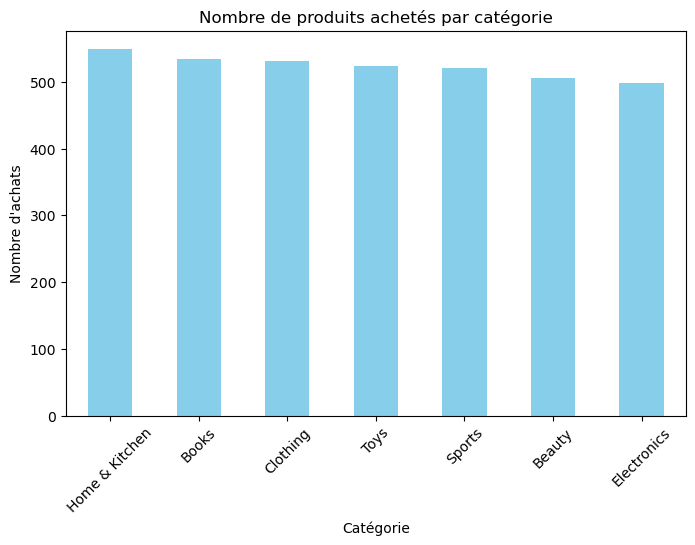

In [93]:
# Visualiser les catégories les plus achetées
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8,5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre de produits achetés par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'achats')
plt.xticks(rotation=45)
plt.show()

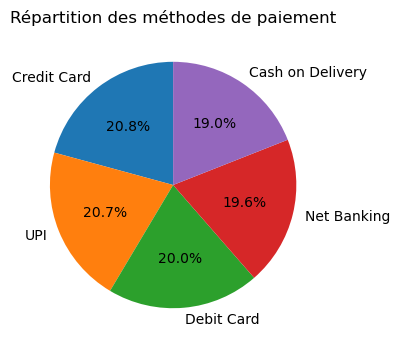

In [94]:
# Visualiser les méthodes de paiement
payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(6,4))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Répartition des méthodes de paiement')
plt.ylabel('')
plt.show()

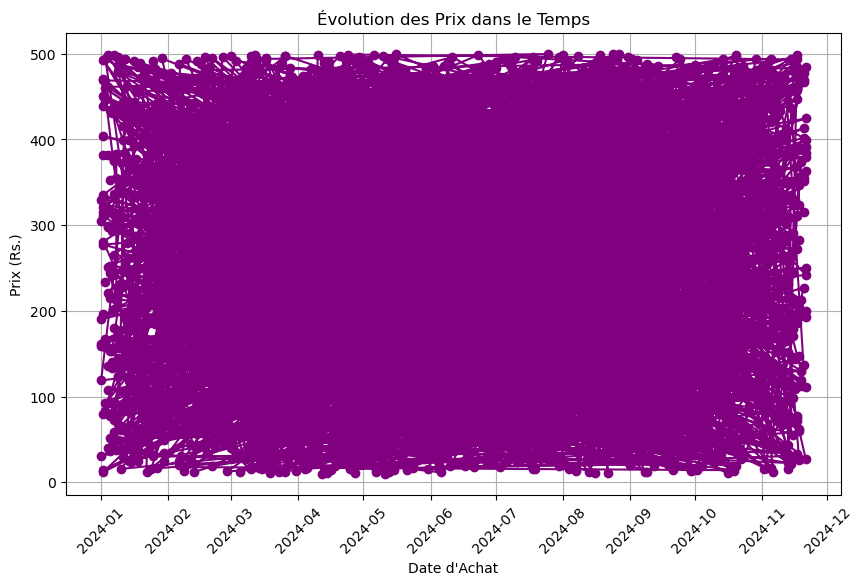

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(df['Purchase_Date'], df['Price (Rs.)'], marker='o', linestyle='-', color='purple')
plt.title('Évolution des Prix dans le Temps')
plt.xlabel('Date d\'Achat')
plt.ylabel('Prix (Rs.)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

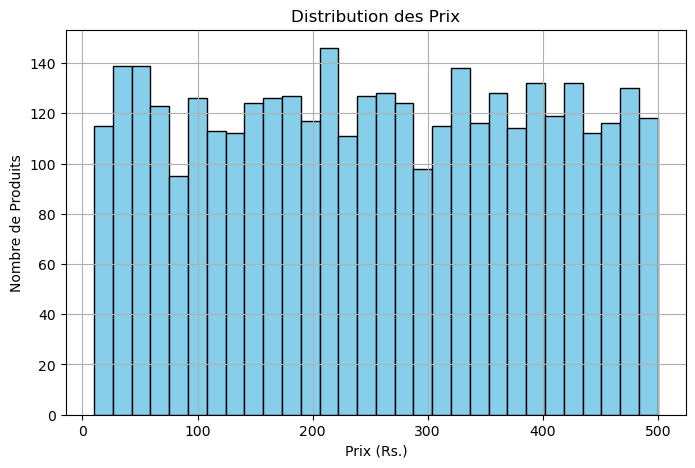

In [99]:
plt.figure(figsize=(8, 5))
plt.hist(df['Price (Rs.)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des Prix')
plt.xlabel('Prix (Rs.)')
plt.ylabel('Nombre de Produits')
plt.grid(True)
plt.show()

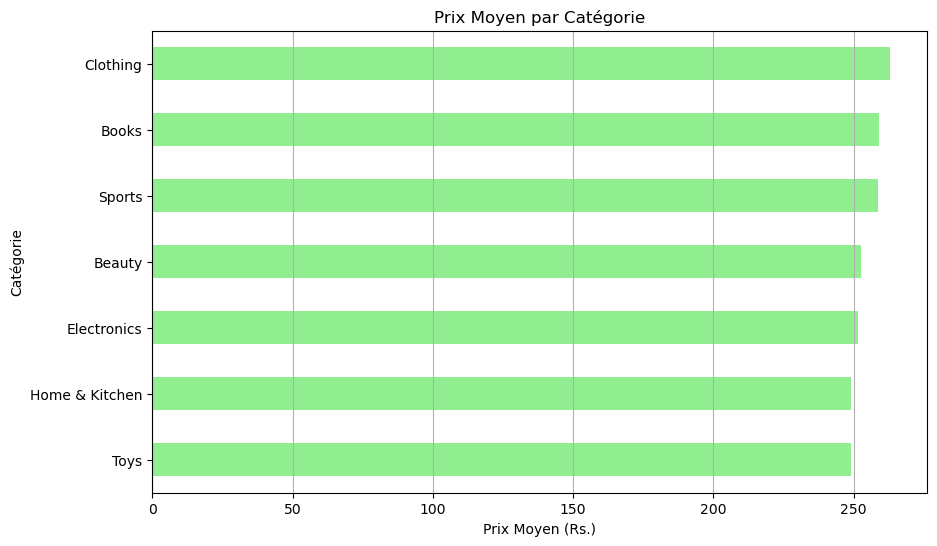

In [103]:
categorie_prix_moyen = df.groupby('Category')['Price (Rs.)'].mean().sort_values()

plt.figure(figsize=(10, 6))
categorie_prix_moyen.plot(kind='barh', color='lightgreen')
plt.title('Prix Moyen par Catégorie')
plt.xlabel('Prix Moyen (Rs.)')
plt.ylabel('Catégorie')
plt.grid(axis='x')
plt.show()

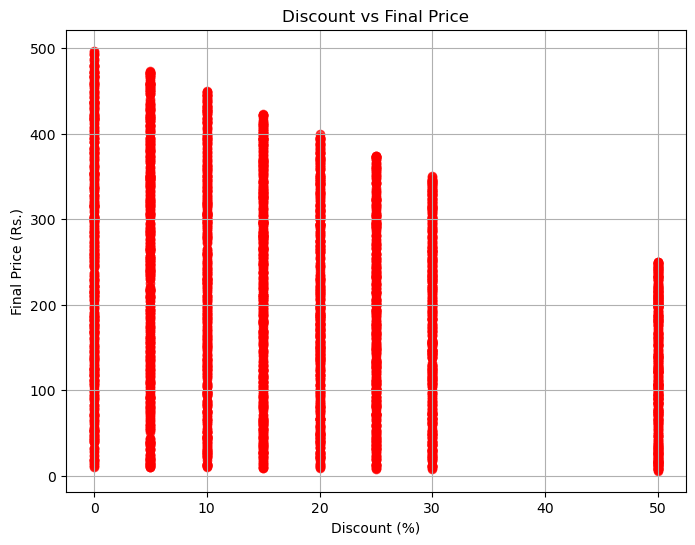

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Discount (%)'], df['Final_Price(Rs.)'], alpha=0.7, color='red')
plt.title('Discount vs Final Price')
plt.xlabel('Discount (%)')
plt.ylabel('Final Price (Rs.)')
plt.grid(True)
plt.show()